# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки

составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [18]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Загружаем "Boston House Prices dataset"
# из встроенных наборов данных sklearn и создаем датафреймы X и y
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

In [20]:
# Разбиваем данные на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Масштабируем данные с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Строим модель TSNE на тренировочных данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

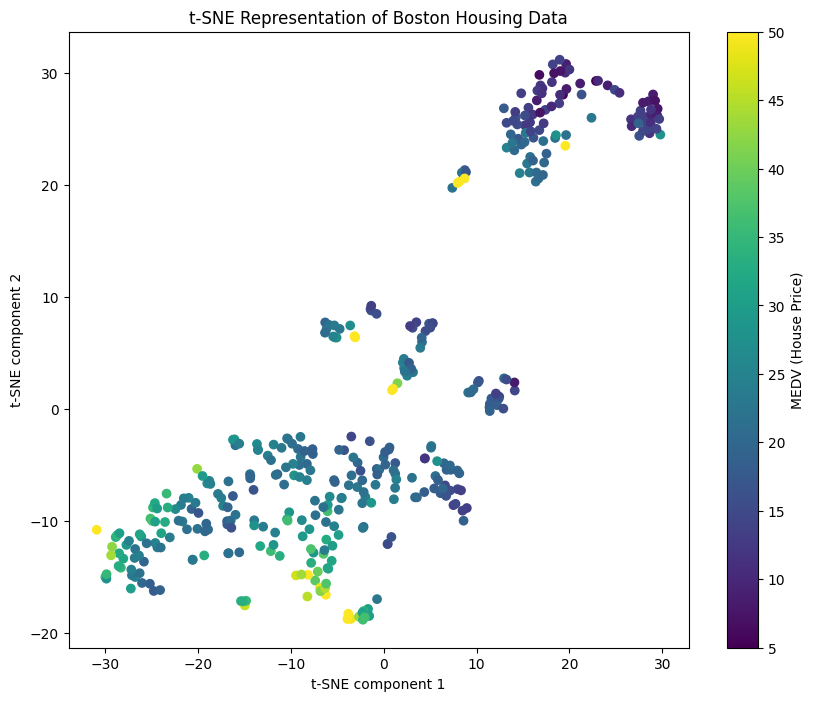

In [23]:
# Построим диаграмму рассеяния для визуализации данных
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Representation of Boston Housing Data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar(label='MEDV (House Price)')
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,

и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
from sklearn.cluster import KMeans

In [25]:
# Кластеризация с KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

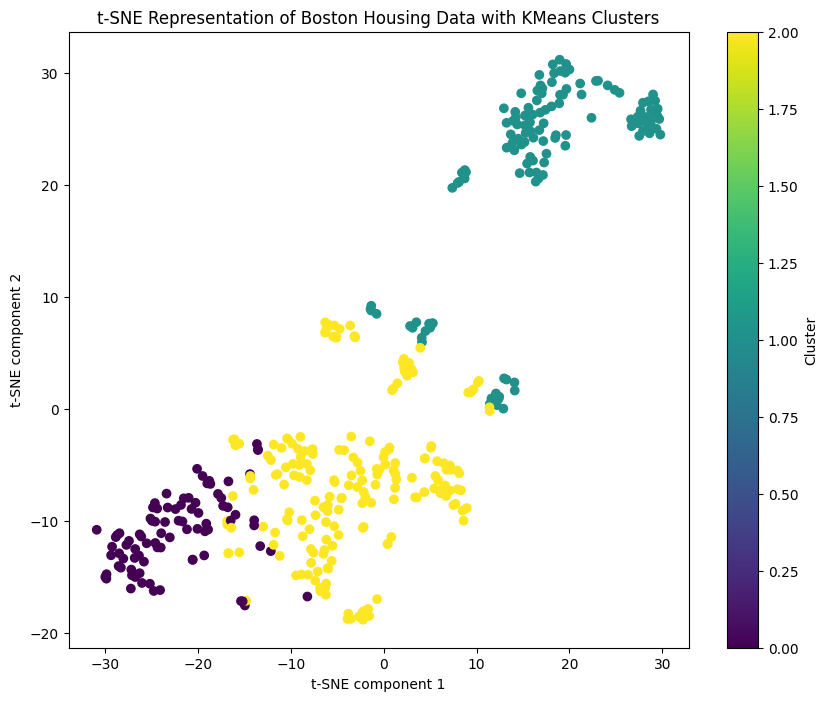

In [26]:
# Визуализация с t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Representation of Boston Housing Data with KMeans Clusters')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar(label='Cluster')
plt.show()

In [27]:
# Добавление кластеров в тренировочный датафрейм
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = clusters

In [28]:
# Вычисление средних значений price (MEDV) и CRIM по кластерам
cluster_means = X_train_clustered.groupby('Cluster').mean()[['CRIM']]
cluster_means['MEDV'] = y_train.groupby(clusters).mean()

print("Средние значения price (MEDV) и CRIM по кластерам:")
print(cluster_means)

Средние значения price (MEDV) и CRIM по кластерам:
              CRIM       MEDV
Cluster                      
0         0.073566  27.788372
1        10.797028  16.165354
2         0.421660  24.958115


## Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
# Применение KMeans к тестовым данным
clusters_test = kmeans.predict(X_test_scaled)

In [30]:
# Добавление кластеров в тестовый датафрейм
X_test_clustered = X_test.copy()
X_test_clustered['Cluster'] = clusters_test

In [31]:
# Вычисление средних значений price (MEDV) и CRIM по кластерам на тестовых данных
cluster_means_test = X_test_clustered.groupby('Cluster').mean()[['CRIM']]
cluster_means_test['MEDV'] = y_test.groupby(clusters_test).mean()

print("Средние значения price (MEDV) и CRIM по кластерам на тестовых данных:")
print(cluster_means_test)

Средние значения price (MEDV) и CRIM по кластерам на тестовых данных:
              CRIM       MEDV
Cluster                      
0         0.062060  31.350000
1        10.165531  16.437143
2         0.266079  21.860784


На основании выполненных операций с использованием модели KMeans на тренировочных и тестовых данных, можно сделать следующие выводы:

1. **Кластеризация данных:** Модель KMeans разбила данные на 3 кластера на основе всех признаков из тренировочного набора. Эти кластеры были затем применены к тестовым данным для анализа их распределения в пространстве признаков.

2. **Визуализация с использованием t-SNE:** Для визуализации данных после применения кластеризации была использована t-SNE, что позволило уменьшить размерность данных до 2 компонент и визуально оценить, как различные кластеры располагаются в пространстве признаков.

3. **Средние значения целевой переменной и признака CRIM по кластерам:**

- На тренировочных данных были вычислены средние значения price (MEDV) и CRIM для каждого из 3 кластеров. Эти значения показывают характеристики цен на жилье и уровень преступности в разных группах кластеров.
- Аналогично на тестовых данных были вычислены средние значения price (MEDV) и CRIM, что позволяет сравнить, какие характеристики сохранились или изменились для кластеров на новых данных.

**Интерпретация результатов:** Результаты показывают, что модель KMeans смогла выделить кластеры с разными уровнями цен на жилье и уровнем преступности. Анализ средних значений позволяет лучше понять, какие признаки влияют на принадлежность к различным кластерам, что может быть полезно для понимания рынка недвижимости и принятия решений в сфере недвижимости.

Таким образом, использование методов кластеризации вместе с визуализацией и анализом средних значений позволяет глубже понять структуру данных и выделить различные сегменты, что может быть полезно для разработки стратегий в области бизнеса или анализа социально-экономических процессов.